In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag

In [ ]:
spark = SparkSession.builder.appName("TATAMOTORS").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/drive/MyDrive/TATAMOTORS/TATAMOTORS.csv")

In [ ]:
df.show(truncate=False)

+-------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|Price                    |Adj Close    |Close        |High         |Low          |Open         |Volume       |
+-------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|Ticker                   |TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|
|Date                     |NULL         |NULL         |NULL         |NULL         |NULL         |NULL         |
|1991-01-02 00:00:00+00:00|15.69022369  |21.85786438  |21.85786438  |20.95959663  |20.95959663  |0            |
|1991-01-03 00:00:00+00:00|15.69022369  |21.85786438  |21.85786438  |20.95959663  |20.95959663  |0            |
|1991-01-04 00:00:00+00:00|15.69022369  |21.85786438  |21.85786438  |21.85786438  |21.85786438  |0            |
|1991-01-07 00:00:00+00:00|15.15288448  |21.10930824  |21.25901985  |20.06132889  |20.3607502   |0      

In [ ]:
cleaned_df=df.dropna()

In [ ]:
print(df.columns)

['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [ ]:
df_cleaned=df.filter((col("Price").isNotNull()) & (col("Adj Close").isNotNull()) & (col("Close").isNotNull()) & (col("High").isNotNull())& (col("Low").isNotNull())& (col("Open").isNotNull())& (col("Volume").isNotNull()))

In [ ]:
df_cleaned.show()

+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|               Price|    Adj Close|        Close|         High|          Low|         Open|       Volume|
+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|              Ticker|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|TATAMOTORS.NS|
|1991-01-02 00:00:...|  15.69022369|  21.85786438|  21.85786438|  20.95959663|  20.95959663|            0|
|1991-01-03 00:00:...|  15.69022369|  21.85786438|  21.85786438|  20.95959663|  20.95959663|            0|
|1991-01-04 00:00:...|  15.69022369|  21.85786438|  21.85786438|  21.85786438|  21.85786438|            0|
|1991-01-07 00:00:...|  15.15288448|  21.10930824|  21.25901985|  20.06132889|   20.3607502|            0|
|1991-01-08 00:00:...|  15.15288448|  21.10930824|  21.10930824|  21.10930824|  21.10930824|            0|
|1991-01-09 00:00:...|  14.72302055| 

In [ ]:
df_cleaned = spark.createDataFrame(df_cleaned.tail(df_cleaned.count() - 1), schema=df_cleaned.schema)

In [ ]:
df_cleaned.show()

+--------------------+-----------+-----------+-----------+-----------+-----------+------+
|               Price|  Adj Close|      Close|       High|        Low|       Open|Volume|
+--------------------+-----------+-----------+-----------+-----------+-----------+------+
|1991-01-02 00:00:...|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|     0|
|1991-01-03 00:00:...|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|     0|
|1991-01-04 00:00:...|15.69022369|21.85786438|21.85786438|21.85786438|21.85786438|     0|
|1991-01-07 00:00:...|15.15288448|21.10930824|21.25901985|20.06132889| 20.3607502|     0|
|1991-01-08 00:00:...|15.15288448|21.10930824|21.10930824|21.10930824|21.10930824|     0|
|1991-01-09 00:00:...|14.72302055|20.51046181|21.25901985|20.06132889|21.25901985|     0|
|1991-01-10 00:00:...|14.72302055|20.51046181|20.51046181|20.51046181|20.51046181|     0|
|1991-01-11 00:00:...|15.04541588|20.95959663|20.95959663|20.06132889| 20.3607502|     0|
|1991-01-1

In [ ]:
df_cleaned = df_cleaned.withColumnRenamed("Price", "Date")

In [ ]:
df_cleaned.show(5,truncate=False)

+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|Date                     |Adj Close  |Close      |High       |Low        |Open       |Volume|
+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|1991-01-02 00:00:00+00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|0     |
|1991-01-03 00:00:00+00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|0     |
|1991-01-04 00:00:00+00:00|15.69022369|21.85786438|21.85786438|21.85786438|21.85786438|0     |
|1991-01-07 00:00:00+00:00|15.15288448|21.10930824|21.25901985|20.06132889|20.3607502 |0     |
|1991-01-08 00:00:00+00:00|15.15288448|21.10930824|21.10930824|21.10930824|21.10930824|0     |
+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
only showing top 5 rows



In [ ]:
df_cleaned = df_cleaned.withColumnRenamed("Adj Close", "Adj_Close")

In [ ]:
df_cleaned.show(5,truncate=False)

+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|Date                     |Adj_Close  |Close      |High       |Low        |Open       |Volume|
+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|1991-01-02 00:00:00+00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|0     |
|1991-01-03 00:00:00+00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|0     |
|1991-01-04 00:00:00+00:00|15.69022369|21.85786438|21.85786438|21.85786438|21.85786438|0     |
|1991-01-07 00:00:00+00:00|15.15288448|21.10930824|21.25901985|20.06132889|20.3607502 |0     |
|1991-01-08 00:00:00+00:00|15.15288448|21.10930824|21.10930824|21.10930824|21.10930824|0     |
+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
only showing top 5 rows



In [ ]:
df_cleaned.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
df_cleaned.count()

8556

In [ ]:
df_cleaned.coalesce(1).write.format("csv").option("header", "true").mode("overwrite").save("/content/drive/MyDrive/TATAMOTORS ")

In [ ]:
tata = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/drive/MyDrive/TATAMOTORS/TATAMOTORS.csv /part-00000-2e2b2f33-d2bf-4c56-a58b-5c06426a433c-c000.csv")

In [ ]:
tata.registerTempTable("TATA_Stocks")

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
tata.show()

+-------------------+-----------+-----------+-----------+-----------+-----------+------+
|               Date|  Adj_Close|      Close|       High|        Low|       Open|Volume|
+-------------------+-----------+-----------+-----------+-----------+-----------+------+
|1991-01-02 00:00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|     0|
|1991-01-03 00:00:00|15.69022369|21.85786438|21.85786438|20.95959663|20.95959663|     0|
|1991-01-04 00:00:00|15.69022369|21.85786438|21.85786438|21.85786438|21.85786438|     0|
|1991-01-07 00:00:00|15.15288448|21.10930824|21.25901985|20.06132889| 20.3607502|     0|
|1991-01-08 00:00:00|15.15288448|21.10930824|21.10930824|21.10930824|21.10930824|     0|
|1991-01-09 00:00:00|14.72302055|20.51046181|21.25901985|20.06132889|21.25901985|     0|
|1991-01-10 00:00:00|14.72302055|20.51046181|20.51046181|20.51046181|20.51046181|     0|
|1991-01-11 00:00:00|15.04541588|20.95959663|20.95959663|20.06132889| 20.3607502|     0|
|1991-01-14 00:00:00|

In [ ]:
from pyspark.sql.functions import year,month
from pyspark.sql.window import Window
from pyspark.sql import functions as F

In [ ]:
tata.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Adj_Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [ ]:
1. Daily Returns
Calculate daily percentage changes in the Adj_Close price.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

#Calculate daily percentage changes in the Adj_Close price.
# Calculate daily returns
tata = tata.withColumn(
    "Daily_Return",
    (F.col("Adj_Close") - F.lag("Adj_Close").over(Window.orderBy("Date"))) / F.lag("Adj_Close").over(Window.orderBy("Date"))
)

# Show results
tata.select("Date", "Adj_Close", "Daily_Return").show()


+-------------------+-----------+--------------------+
|               Date|  Adj_Close|        Daily_Return|
+-------------------+-----------+--------------------+
|1991-01-02 00:00:00|15.69022369|                NULL|
|1991-01-03 00:00:00|15.69022369|                 0.0|
|1991-01-04 00:00:00|15.69022369|                 0.0|
|1991-01-07 00:00:00|15.15288448|-0.03424675266691491|
|1991-01-08 00:00:00|15.15288448|                 0.0|
|1991-01-09 00:00:00|14.72302055|-0.02836845556153...|
|1991-01-10 00:00:00|14.72302055|                 0.0|
|1991-01-11 00:00:00|15.04541588| 0.02189736330973204|
|1991-01-14 00:00:00|14.61554909|-0.02857128001170...|
|1991-01-15 00:00:00|14.61554909|                 0.0|
|1991-01-16 00:00:00|14.61554909|                 0.0|
|1991-01-17 00:00:00|14.61554909|                 0.0|
|1991-01-18 00:00:00|14.61554909|                 0.0|
|1991-01-21 00:00:00|14.61554909|                 0.0|
|1991-01-22 00:00:00|14.61554909|                 0.0|
|1991-01-2

In [ ]:
2. Volume Analysis
Aggregate total volume traded over time (e.g., monthly or yearly).

In [ ]:
# Extract year and month
tata = tata.withColumn("Year", F.year("Date")).withColumn("Month", F.month("Date"))

# Aggregate by year and month
volume_analysis = tata.groupBy("Year", "Month").agg(F.sum("Volume").alias("Total_Volume"))

# Show results
# volume_analysis.orderBy("Year", "Month").show(5)
volume_analysis.orderBy(F.desc("Total_Volume")).show(5)


+----+-----+------------+
|Year|Month|Total_Volume|
+----+-----+------------+
|2021|    1|  3110819324|
|2020|    6|  2061553847|
|2021|    2|  2011804897|
|2020|    8|  1866004733|
|2020|    3|  1625401538|
+----+-----+------------+
only showing top 5 rows



In [ ]:
3. Trends in Adj_Close
Calculate a cumulative trend or visualize the Adj_Close trends.

In [ ]:
# Simple trend analysis: cumulative sum of Adjusted Close
trend = tata.withColumn("Cumulative_Trend", F.sum("Adj_Close").over(Window.orderBy("Date")))

# Show results
trend.select("Date", "Adj_Close", "Cumulative_Trend").show(5)

+-------------------+-----------+----------------+
|               Date|  Adj_Close|Cumulative_Trend|
+-------------------+-----------+----------------+
|1991-01-02 00:00:00|15.69022369|     15.69022369|
|1991-01-03 00:00:00|15.69022369|     31.38044738|
|1991-01-04 00:00:00|15.69022369|     47.07067107|
|1991-01-07 00:00:00|15.15288448|     62.22355555|
|1991-01-08 00:00:00|15.15288448|     77.37644003|
+-------------------+-----------+----------------+
only showing top 5 rows



In [ ]:
4. Moving Averages
Compute rolling averages for Adj_Close (e.g., 7-day and 30-day moving averages).

In [ ]:
# Define windows for moving averages
window_7 = Window.orderBy("Date").rowsBetween(-6, 0)
window_30 = Window.orderBy("Date").rowsBetween(-29, 0)

# Calculate moving averages
tata = tata.withColumn("MA_7", F.avg("Adj_Close").over(window_7)) \
           .withColumn("MA_30", F.avg("Adj_Close").over(window_30))

# Show results
tata.select("Date", "Adj_Close", "MA_7", "MA_30").show()

+-------------------+-----------+------------------+------------------+
|               Date|  Adj_Close|              MA_7|             MA_30|
+-------------------+-----------+------------------+------------------+
|1991-01-02 00:00:00|15.69022369|       15.69022369|       15.69022369|
|1991-01-03 00:00:00|15.69022369|       15.69022369|       15.69022369|
|1991-01-04 00:00:00|15.69022369|15.690223690000002|15.690223690000002|
|1991-01-07 00:00:00|15.15288448|     15.5558888875|     15.5558888875|
|1991-01-08 00:00:00|15.15288448|      15.475288006|      15.475288006|
|1991-01-09 00:00:00|14.72302055|15.349910096666667|15.349910096666667|
|1991-01-10 00:00:00|14.72302055|15.260354447142857|15.260354447142857|
|1991-01-11 00:00:00|15.04541588|15.168239045714285|15.233487126250001|
|1991-01-14 00:00:00|14.61554909|15.014714102857145|15.164827344444445|
|1991-01-15 00:00:00|14.61554909|       14.86118916|      15.109899519|
|1991-01-16 00:00:00|14.61554909| 14.78442696142857|15.064958570

In [ ]:
w

In [ ]:
# Calculate daily spread
tata = tata.withColumn("High_Low_Spread", F.col("High") - F.col("Low"))

# Show results
tata.select("Date", "High", "Low", "High_Low_Spread").show(5)

+-------------------+-----------+-----------+------------------+
|               Date|       High|        Low|   High_Low_Spread|
+-------------------+-----------+-----------+------------------+
|1991-01-02 00:00:00|21.85786438|20.95959663|0.8982677499999987|
|1991-01-03 00:00:00|21.85786438|20.95959663|0.8982677499999987|
|1991-01-04 00:00:00|21.85786438|21.85786438|               0.0|
|1991-01-07 00:00:00|21.25901985|20.06132889|1.1976909600000027|
|1991-01-08 00:00:00|21.10930824|21.10930824|               0.0|
+-------------------+-----------+-----------+------------------+
only showing top 5 rows



In [ ]:
6. Yearly/Monthly Performance
Aggregate performance by year or month using Adj_Close.

In [ ]:
from pyspark.sql.functions import year, month, avg

# Add 'Year' and 'Month' columns by extracting them from 'Date'
tata = tata.withColumn("Year", year("Date")).withColumn("Month", month("Date"))

# Yearly average performance
yearly_performance = tata.groupBy("Year").agg(avg("Adj_Close").alias("Yearly_Avg"))

# Monthly average performance
monthly_performance = tata.groupBy("Year", "Month").agg(avg("Adj_Close").alias("Monthly_Avg"))

# Show results
yearly_performance.show(5)
# monthly_performance.orderBy("Year", "Month").show(5)
monthly_performance.orderBy(F.desc("Monthly_Avg")).show(5)

+----+------------------+
|Year|        Yearly_Avg|
+----+------------------+
|2003| 37.92144249245214|
|2007|127.18220732137087|
|2018|283.00248929349596|
|2015| 443.7888011162604|
|2023| 555.8931817489796|
+----+------------------+
only showing top 5 rows

+----+-----+------------------+
|Year|Month|       Monthly_Avg|
+----+-----+------------------+
|2024|    8|1075.5857136190477|
|2024|    7|1034.3636363545456|
|2024|    9|1006.7857113714288|
|2024|    4| 995.2188293149999|
|2024|    3| 982.9527960888889|
+----+-----+------------------+
only showing top 5 rows



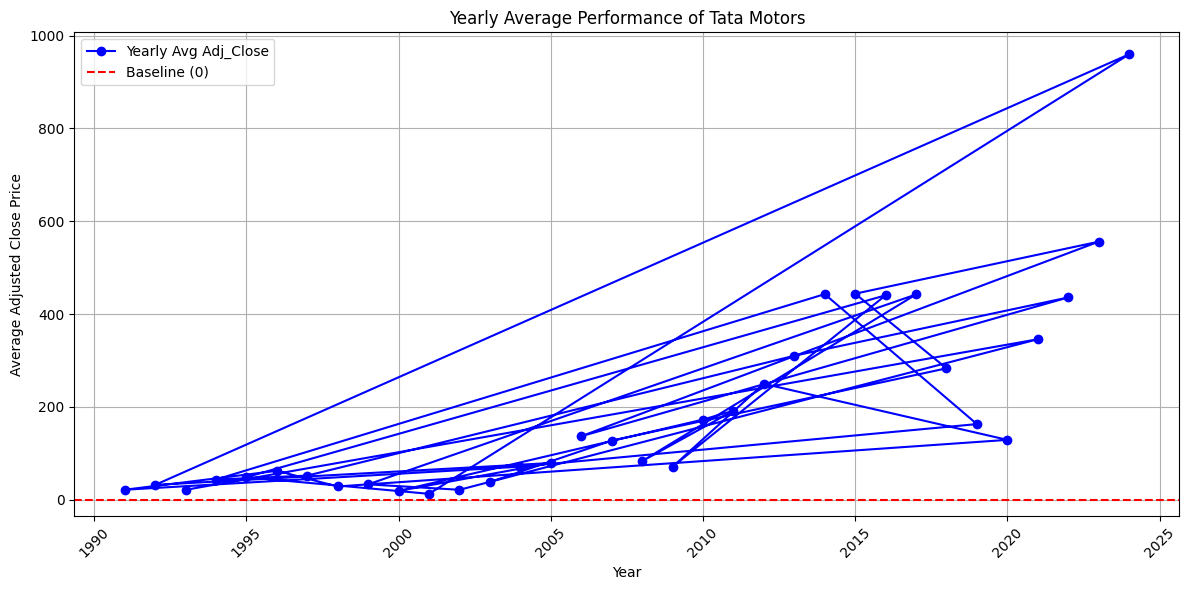

In [ ]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrames to Pandas for plotting
yearly_df = yearly_performance.toPandas()
monthly_df = monthly_performance.orderBy("Year", "Month").toPandas()

# Plot Yearly Average Performance
plt.figure(figsize=(12, 6))
plt.plot(yearly_df["Year"], yearly_df["Yearly_Avg"], marker='o', linestyle='-', color='blue', label='Yearly Avg Adj_Close')
plt.axhline(y=0, color='red', linestyle='--', label='Baseline (0)')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price')
plt.title('Yearly Average Performance of Tata Motors')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plot Monthly Average Performance
plt.figure(figsize=(16, 8))
# Create a composite column "Year-Month" for better x-axis labels
monthly_df["Year-Month"] = monthly_df["Year"].astype(str) + "-" + monthly_df["Month"].astype(str).str.zfill(2)
plt.plot(monthly_df["Year-Month"], monthly_df["Monthly_Avg"], marker='o', linestyle='-', color='green', label='Monthly Avg Adj_Close')
plt.axhline(y=0, color='red', linestyle='--', label='Baseline (0)')
plt.xlabel('Year-Month')
plt.ylabel('Average Adjusted Close Price')
plt.title('Monthly Average Performance of Tata Motors')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
pip install matplotlib pandas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Plot a 50-day moving average alongside the adjusted close price.
window_50 = Window.orderBy("Date").rowsBetween(-49, 0)
tata = tata.withColumn("MA_50", F.avg("Adj_Close").over(window_50))
tata.select("Date", "Adj_Close", "MA_50").show(5)

+-------------------+-----------+------------------+
|               Date|  Adj_Close|             MA_50|
+-------------------+-----------+------------------+
|1991-01-02 00:00:00|15.69022369|       15.69022369|
|1991-01-03 00:00:00|15.69022369|       15.69022369|
|1991-01-04 00:00:00|15.69022369|15.690223690000002|
|1991-01-07 00:00:00|15.15288448|     15.5558888875|
|1991-01-08 00:00:00|15.15288448|      15.475288006|
+-------------------+-----------+------------------+
only showing top 5 rows



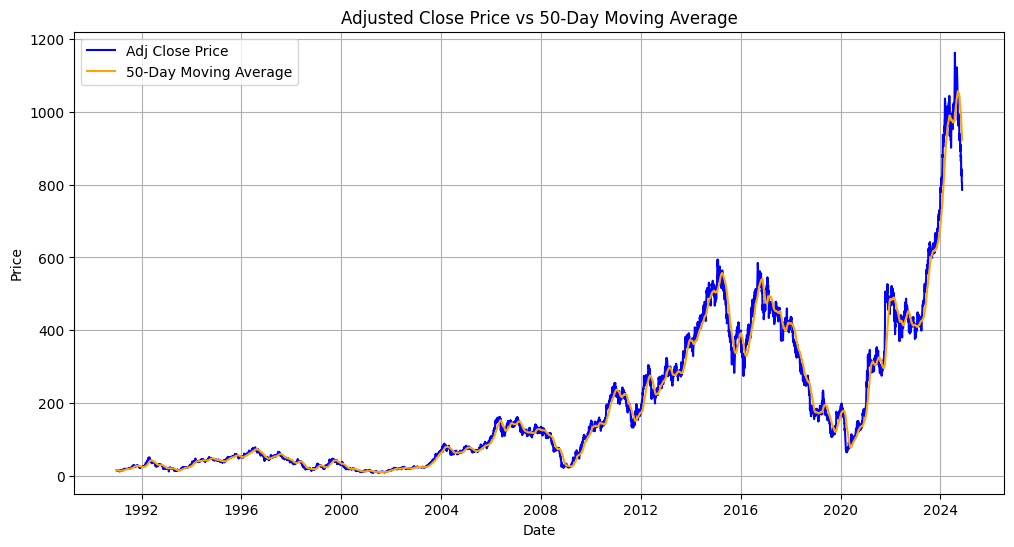

In [ ]:
# Line Chart: Adj_Close and Moving Average
# Collect data into Pandas for visualization
adj_close_data = tata.select("Date", "Adj_Close", "MA_50").orderBy("Date").toPandas()
adj_close_data["Date"] = pd.to_datetime(adj_close_data["Date"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(adj_close_data["Date"], adj_close_data["Adj_Close"], label="Adj Close Price", color="blue")
plt.plot(adj_close_data["Date"], adj_close_data["MA_50"], label="50-Day Moving Average", color="orange")
plt.title("Adjusted Close Price vs 50-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Find the total trading volume for each year.
yearly_volume = tata.groupBy("Year").agg(F.sum("Volume").alias("Total_Volume"))
yearly_volume.orderBy("Year").show()

+----+------------+
|Year|Total_Volume|
+----+------------+
|1991|           0|
|1992|           0|
|1993|           0|
|1994|           0|
|1995|    48338516|
|1996|   383537009|
|1997|  1792963792|
|1998|  2608826707|
|1999|  3227723129|
|2000|  1189678769|
|2001|  1485862014|
|2002|  2264495279|
|2003|  4549198323|
|2004|  6133165301|
|2005|  2640287084|
|2006|  2323047564|
|2007|  1806206847|
|2008|  1544447980|
|2009|  5961583105|
|2010|  4936495926|
+----+------------+
only showing top 20 rows



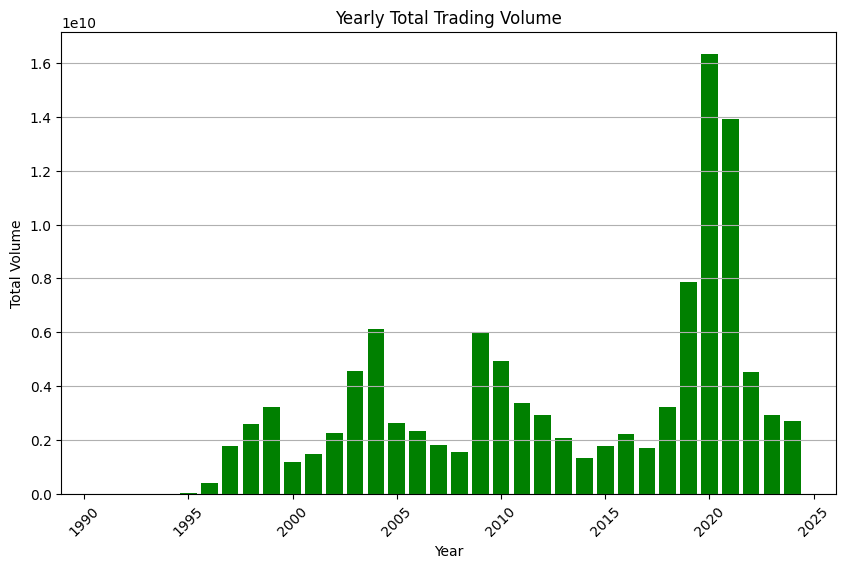

In [ ]:
# Bar Chart: Yearly Total Volume
# Collect yearly volume data
yearly_volume_data = yearly_volume.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_volume_data["Year"], yearly_volume_data["Total_Volume"], color="green")
plt.title("Yearly Total Trading Volume")
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

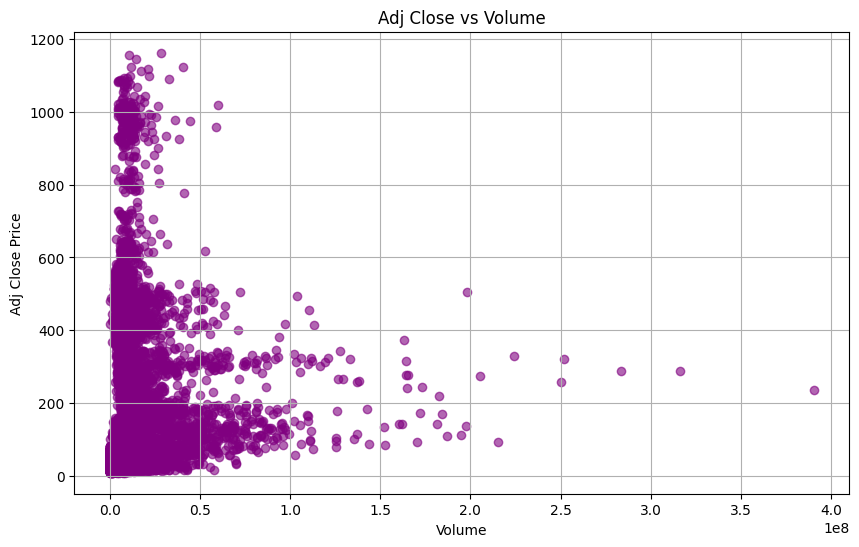

In [ ]:
# Scatter Plot: Correlation Between Adj_Close and Volume
# Collect data for correlation
scatter_data = tata.select("Adj_Close", "Volume").toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["Volume"], scatter_data["Adj_Close"], alpha=0.6, color="purple")
plt.title("Adj Close vs Volume")
plt.xlabel("Volume")
plt.ylabel("Adj Close Price")
plt.grid()
plt.show()

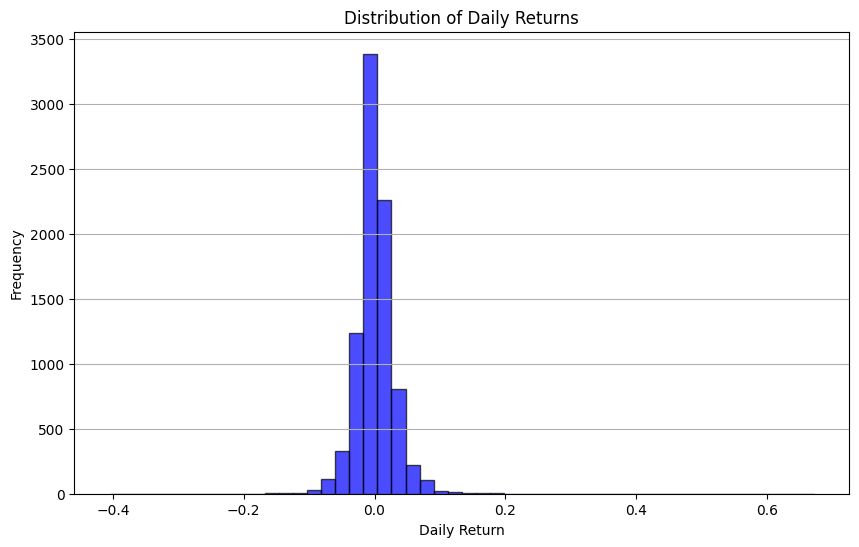

In [ ]:
# Histogram: Distribution of Daily Returns
# Collect daily return data
daily_return_data = tata.select("Daily_Return").dropna().toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(daily_return_data["Daily_Return"], bins=50, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [ ]:
# Classify trading days as bullish (close > open), bearish (close < open), or neutral (close == open).

tata = tata.withColumn(
    "Market_Trend",
    F.when(F.col("Close") > F.col("Open"), "Bullish")
     .when(F.col("Close") < F.col("Open"), "Bearish")
     .otherwise("Neutral")
)
trend_summary = tata.groupBy("Market_Trend").count()
trend_summary.show()


+------------+-----+
|Market_Trend|count|
+------------+-----+
|     Neutral|  515|
|     Bearish| 4304|
|     Bullish| 3737|
+------------+-----+



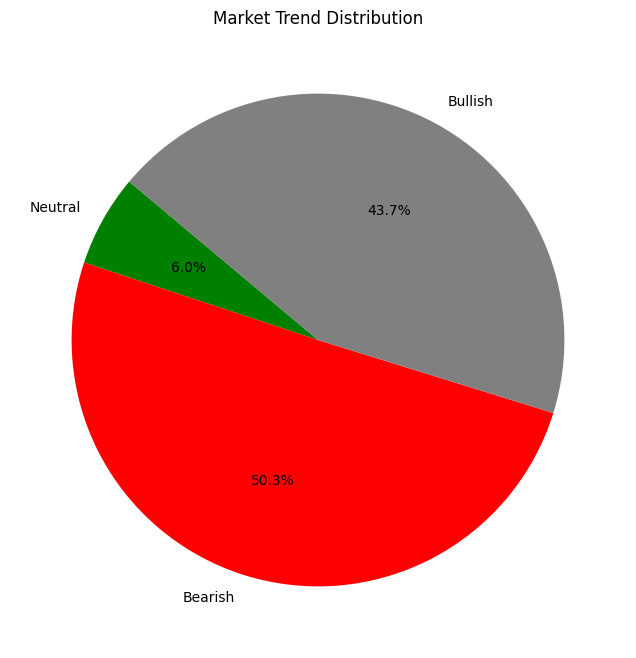

In [ ]:
# Collect market trend data
trend_summary_data = trend_summary.toPandas()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    trend_summary_data["count"],
    labels=trend_summary_data["Market_Trend"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["green", "red", "gray"]
)
plt.title("Market Trend Distribution")
plt.show()


In [ ]:
window_50 = Window.orderBy("Date").rowsBetween(-49, 0)
tata = tata.withColumn("MA_50", F.avg("Adj_Close").over(window_50))
tata.select("Date", "Adj_Close", "MA_50").show(5)

+-------------------+-----------+------------------+
|               Date|  Adj_Close|             MA_50|
+-------------------+-----------+------------------+
|1991-01-02 00:00:00|15.69022369|       15.69022369|
|1991-01-03 00:00:00|15.69022369|       15.69022369|
|1991-01-04 00:00:00|15.69022369|15.690223690000002|
|1991-01-07 00:00:00|15.15288448|     15.5558888875|
|1991-01-08 00:00:00|15.15288448|      15.475288006|
+-------------------+-----------+------------------+
only showing top 5 rows



In [ ]:
ma_comparison = tata.select("Date", "Adj_Close", "MA_20", "MA_50", "MA_200").orderBy("Date")
ma_comparison.show()

+-------------------+-----------+------------------+------------------+------------------+
|               Date|  Adj_Close|             MA_20|             MA_50|            MA_200|
+-------------------+-----------+------------------+------------------+------------------+
|1991-01-02 00:00:00|15.69022369|       15.69022369|       15.69022369|       15.69022369|
|1991-01-03 00:00:00|15.69022369|       15.69022369|       15.69022369|       15.69022369|
|1991-01-04 00:00:00|15.69022369|15.690223690000002|15.690223690000002|15.690223690000002|
|1991-01-07 00:00:00|15.15288448|     15.5558888875|     15.5558888875|     15.5558888875|
|1991-01-08 00:00:00|15.15288448|      15.475288006|      15.475288006|      15.475288006|
|1991-01-09 00:00:00|14.72302055|15.349910096666667|15.349910096666667|15.349910096666667|
|1991-01-10 00:00:00|14.72302055|15.260354447142857|15.260354447142857|15.260354447142857|
|1991-01-11 00:00:00|15.04541588|15.233487126250001|15.233487126250001|15.233487126250001|

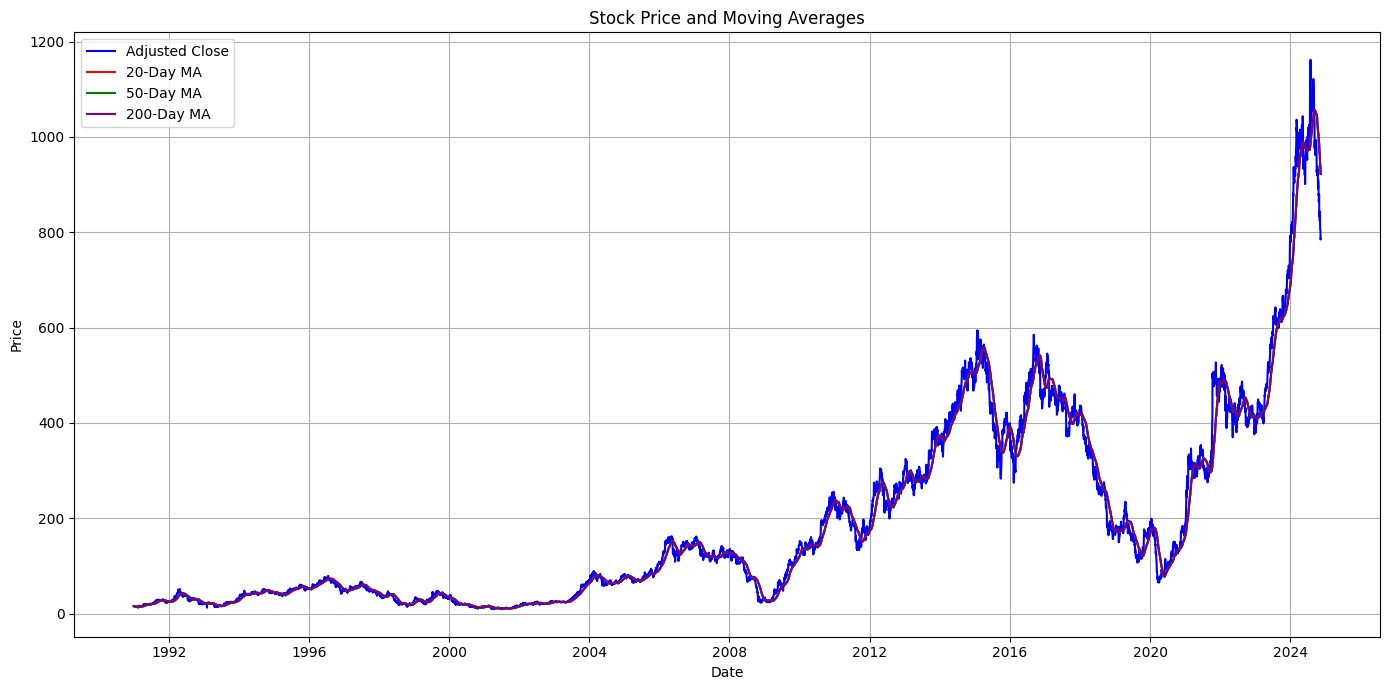

In [ ]:
# Assuming `ma_comparison` is a Spark DataFrame
# Convert Spark DataFrame to Pandas DataFrame
ma_comparison_pd = ma_comparison.toPandas()

# Set the 'Date' column as the index
ma_comparison_pd['Date'] = pd.to_datetime(ma_comparison_pd['Date'])
ma_comparison_pd.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ma_comparison_pd.index, ma_comparison_pd['Adj_Close'], label='Adjusted Close', color='blue')
plt.plot(ma_comparison_pd.index, ma_comparison_pd['MA_20'], label='20-Day MA', color='red')
plt.plot(ma_comparison_pd.index, ma_comparison_pd['MA_50'], label='50-Day MA', color='green')
plt.plot(ma_comparison_pd.index, ma_comparison_pd['MA_200'], label='200-Day MA', color='purple')

plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
yearly_gain = tata.groupBy("Year").agg(
    ((F.last("Adj_Close") - F.first("Adj_Close")) / F.first("Adj_Close") * 100).alias("Yearly_Gain")
)
yearly_gain.orderBy(F.desc("Yearly_Gain")).show(1)

+----+-----------------+
|Year|      Yearly_Gain|
+----+-----------------+
|2009|356.1084411379638|
+----+-----------------+
only showing top 1 row



In [ ]:
from pyspark.sql.functions import year, first, last

# Calculate percentage gain/loss for each year
yearly_gain_loss = tata.withColumn("Year", year("Date")) \
    .groupBy("Year") \
    .agg(
        ((last("Adj_Close") - first("Adj_Close")) / first("Adj_Close") * 100).alias("Yearly_Percentage_Change")
    )

# Show the result
yearly_gain_loss.show()


+----+------------------------+
|Year|Yearly_Percentage_Change|
+----+------------------------+
|2003|       183.6847996908232|
|2007|     -18.566500940364612|
|2018|      -59.31205036828976|
|2015|     -20.654615453871518|
|2023|       98.17144614797141|
|2006|       43.20355386561069|
|2022|     -22.035774830999113|
|2013|      19.640952775864186|
|1997|     -15.569965483198272|
|1994|      44.950618723476396|
|2014|      32.729077350159706|
|2019|       6.745466667560727|
|2004|      13.162744227535805|
|1991|       55.47942210376478|
|1996|     -10.201764821575896|
|1998|      -43.99006297075862|
|2020|    -0.32529277590616307|
|2012|        73.0284725275026|
|2009|       356.1084411379638|
|2016|      17.489708302410584|
+----+------------------------+
only showing top 20 rows



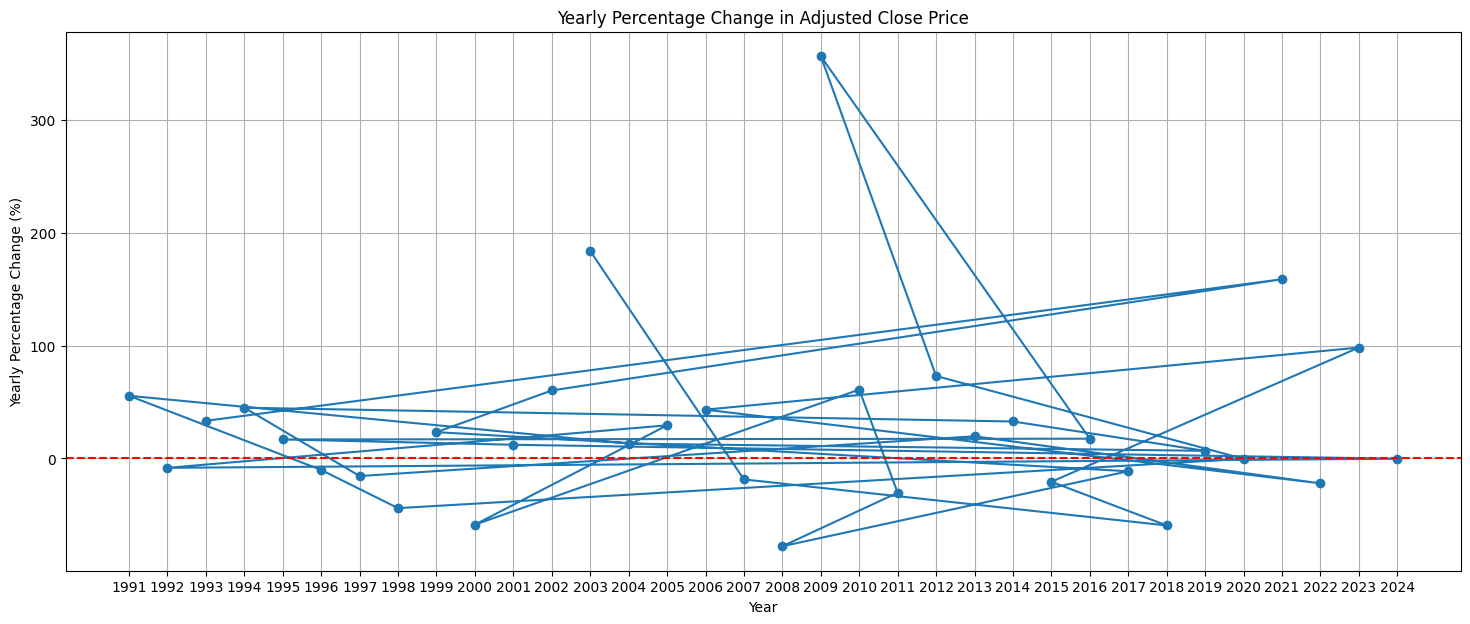

In [ ]:
# Assuming you have a Spark DataFrame named yearly_gain_loss
# Convert Spark DataFrame to Pandas DataFrame
yearly_gain_loss_pandas = yearly_gain_loss.toPandas()

# Plotting the data
plt.figure(figsize=(18, 7))
plt.plot(yearly_gain_loss_pandas['Year'], yearly_gain_loss_pandas['Yearly_Percentage_Change'], marker='o', linestyle='-')
plt.title('Yearly Percentage Change in Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.grid(True)
plt.xticks(yearly_gain_loss_pandas['Year'])  # Optional: Set x-ticks to years for better visibility
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

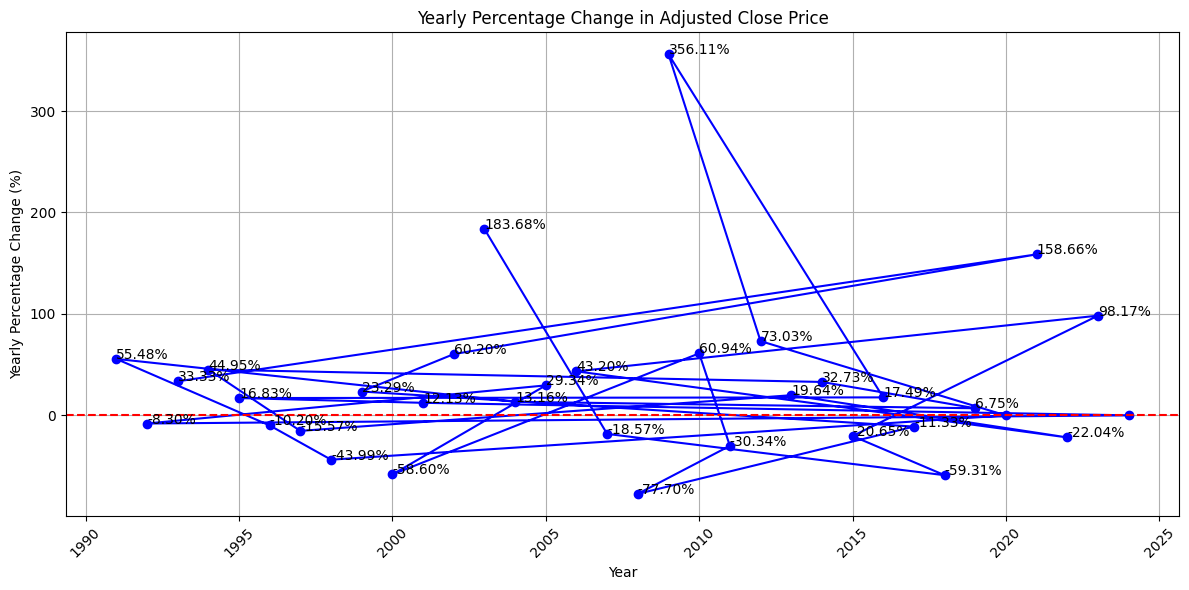

In [ ]:
# Sample data (replace with your actual data from PySpark results)
years = [row['Year'] for row in yearly_gain_loss.collect()]  # Extract the years from PySpark DataFrame
percentage_changes = [row['Yearly_Percentage_Change'] for row in yearly_gain_loss.collect()]  # Extract percentage changes

# Create a larger figure
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(years, percentage_changes, marker='o', linestyle='-', color='b')

# Add a red dashed line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add grid
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.title('Yearly Percentage Change in Adjusted Close Price')

# Add annotations for significant data points (example)
threshold = 5  # Replace with your threshold value for significant points
for i, txt in enumerate(percentage_changes):
    if abs(txt) > threshold:  # Highlight points greater than threshold
        plt.annotate(f'{txt:.2f}%', (years[i], percentage_changes[i]))

# Show the plot
plt.tight_layout()
plt.show()
